In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [23]:
import sys
sys.path.insert(0,'..')

%load_ext autoreload
%autoreload 2

import os,sys,inspect
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import plotly.io as pio
pio.renderers.default='notebook'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# todo: load provided dataset, initial overview, summary, ideas

In [24]:
df_users = pd.read_csv("../data/provided_offline/users.csv")

In [25]:
df_users

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.000,near Utah Ave & Lighthouse an,Robby Delaware,304.000,11484.000,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.000,670.000,13.000
1,100345056.000,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.000,31858.000,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.000,1055.000,35.000
2,247165706.000,"Chicago, IL",B E C K S T E R✨,650.000,6742.000,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.000,896.000,30.000
3,249538861.000,NaN,Chris Osborne,44.000,843.000,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.000,154.000,1.000
4,449689677.000,NaN,Рамзан Кадыров,94773.000,10877.000,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.000,7.000,691.000
5,471868887.000,"Санкт-Петербург, Россия",Маргарита Саваж,23305.000,18401.000,Volgograd,False,ru,MargoSavazh,Честь имею. Нагло врать не умею.,Mon Jan 23 10:26:25 +0000 2012,1480.000,8021.000,231.000
6,1039581360.000,Amerika,Dark Nally,22.000,22603.000,Jakarta,False,id,darknally,uptodate news!!!!,Thu Dec 27 13:06:58 +0000 2012,0.000,40.000,16.000
7,1510488662.000,USA,Laila Heats,3080.000,2228.000,Eastern Time (US & Canada),False,en,lagonehoe,How can you judge me when you don’t know me?,Wed Jun 12 13:07:49 +0000 2013,3504.000,2369.000,12.000
8,1513801268.000,USA,CC Jack,2760.000,2100.000,Eastern Time (US & Canada),False,en,YouJustCtrlC,ProBlack | Stoner | even jesus was stoned befo...,Thu Jun 13 16:07:23 +0000 2013,2744.000,2700.000,10.000
9,1517678892.000,"Philadelphia, PA",Mr Moran,879.000,2044.000,Eastern Time (US & Canada),False,en,MrMoraan,I'm getting too cool for this social media shi...,Fri Jun 14 21:58:48 +0000 2013,2981.000,758.000,15.000


In [26]:
df_users.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                393 non-null    float64
 1   location          285 non-null    object 
 2   name              384 non-null    object 
 3   followers_count   384 non-null    float64
 4   statuses_count    384 non-null    float64
 5   time_zone         369 non-null    object 
 6   verified          384 non-null    object 
 7   lang              384 non-null    object 
 8   screen_name       454 non-null    object 
 9   description       339 non-null    object 
 10  created_at        384 non-null    object 
 11  favourites_count  384 non-null    float64
 12  friends_count     384 non-null    float64
 13  listed_count      384 non-null    float64
dtypes: float64(6), object(8)
memory usage: 49.8+ KB


In [27]:
# there are nulls in user_id - it needs to be handeled

In [28]:
df_users = df_users.dropna(subset=['id'])

In [29]:
df_users.shape

(393, 14)

In [30]:
df_users

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.000,near Utah Ave & Lighthouse an,Robby Delaware,304.000,11484.000,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.000,670.000,13.000
1,100345056.000,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.000,31858.000,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.000,1055.000,35.000
2,247165706.000,"Chicago, IL",B E C K S T E R✨,650.000,6742.000,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.000,896.000,30.000
3,249538861.000,NaN,Chris Osborne,44.000,843.000,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.000,154.000,1.000
4,449689677.000,NaN,Рамзан Кадыров,94773.000,10877.000,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.000,7.000,691.000
5,471868887.000,"Санкт-Петербург, Россия",Маргарита Саваж,23305.000,18401.000,Volgograd,False,ru,MargoSavazh,Честь имею. Нагло врать не умею.,Mon Jan 23 10:26:25 +0000 2012,1480.000,8021.000,231.000
6,1039581360.000,Amerika,Dark Nally,22.000,22603.000,Jakarta,False,id,darknally,uptodate news!!!!,Thu Dec 27 13:06:58 +0000 2012,0.000,40.000,16.000
7,1510488662.000,USA,Laila Heats,3080.000,2228.000,Eastern Time (US & Canada),False,en,lagonehoe,How can you judge me when you don’t know me?,Wed Jun 12 13:07:49 +0000 2013,3504.000,2369.000,12.000
8,1513801268.000,USA,CC Jack,2760.000,2100.000,Eastern Time (US & Canada),False,en,YouJustCtrlC,ProBlack | Stoner | even jesus was stoned befo...,Thu Jun 13 16:07:23 +0000 2013,2744.000,2700.000,10.000
9,1517678892.000,"Philadelphia, PA",Mr Moran,879.000,2044.000,Eastern Time (US & Canada),False,en,MrMoraan,I'm getting too cool for this social media shi...,Fri Jun 14 21:58:48 +0000 2013,2981.000,758.000,15.000


In [31]:
df_users.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                393 non-null    float64
 1   location          285 non-null    object 
 2   name              384 non-null    object 
 3   followers_count   384 non-null    float64
 4   statuses_count    384 non-null    float64
 5   time_zone         369 non-null    object 
 6   verified          384 non-null    object 
 7   lang              384 non-null    object 
 8   screen_name       393 non-null    object 
 9   description       339 non-null    object 
 10  created_at        384 non-null    object 
 11  favourites_count  384 non-null    float64
 12  friends_count     384 non-null    float64
 13  listed_count      384 non-null    float64
dtypes: float64(6), object(8)
memory usage: 46.1+ KB


In [32]:
df_users[df_users.name.isna()].shape

(9, 14)

In [33]:
df_users[df_users.name.isna()] # 9 users with no info, let's see if we will use this data

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
42,4332740714.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA_Gunslinger,NaN,NaN,NaN,NaN,NaN
43,4840551713.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BlackToLive,NaN,NaN,NaN,NaN,NaN
44,4437233895.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crystal1Johnson,NaN,NaN,NaN,NaN,NaN
45,4224729994.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TEN_GOP,NaN,NaN,NaN,NaN,NaN
81,4272870988.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pamela_Moore13,NaN,NaN,NaN,NaN,NaN
192,4508630900.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TheFoundingSon,NaN,NaN,NaN,NaN,NaN
234,1681425248.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MarissaImStrong,NaN,NaN,NaN,NaN,NaN
296,4224912857.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RealTEN_GOP,NaN,NaN,NaN,NaN,NaN
297,737420000043139072.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March_for_Trump,NaN,NaN,NaN,NaN,NaN


In [34]:
#lets cast timestamp

In [35]:
df_users['created_at'] = pd.to_datetime(df_users['created_at'])

<ipython-input-35-7e1a9f7f31c1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### users - review of raw columns

In [36]:
df_users.columns

Index(['id', 'location', 'name', 'followers_count', 'statuses_count',
       'time_zone', 'verified', 'lang', 'screen_name', 'description',
       'created_at', 'favourites_count', 'friends_count', 'listed_count'],
      dtype='object')

In [37]:
df = pd.DataFrame(df_users.location.value_counts())
pd.set_option('display.max_rows', df.shape[0]+1)
df

,location
USA,93
United States,23
Москва,16
"Москва, Россия",9
"Chicago, IL",7
Atlanta,6
US,6
"Atlanta, GA",5
Санкт-Петербург,3
"New York, NY",3


In [38]:
import pandas_profiling

pandas_profiling.ProfileReport(df_users)

profile = pandas_profiling.ProfileReport(df_users,explorative=True,minimal=True)
# profile.to_file("model_input.html")
profile.to_widgets()



/home/jerzy/russian-trolls/venv/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

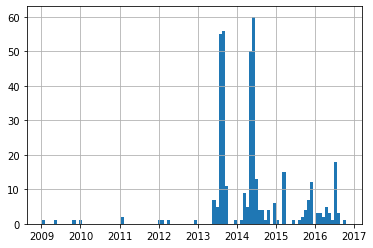

In [41]:
df_users.created_at.hist(bins=100)

### comments:
- the number of users is very small - 394 that is very small sample in comparision to all Twitter population
- there are some russian/east eaurope locations, timezone & language - but should that be a criterium? I think that can be milions on russian speaking twitter accounrs, it will be hard to porpely balance the non-troll dataset
- favorites, frines, listed distributions so fat don't seem special
- timing looks weird - why the peaks in the end of 2013 and mid 2014? accident?